In [2]:
import numpy as np
import matplotlib.pyplot as plt
        
np.random.seed(1)

In [9]:
# Creating dataset
mu_vec1 = np.array([0, 0, 0])
cov_mat1 = np.array([[1, 0, 0],  [0,1,0], [0,0,1]])

class1_sample  = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
print class1_sample

(3, 20)


In [12]:
mu_vec2 = np.array([1, 1, 1])
cov_mat2 = np.array([[1, 0, 0],  [0,1,0], [0,0,1]])

class2_sample  = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
print class2_sample

[[ -4.98213564e-01  -1.39662042e+00   6.18539131e-01  -1.30572692e+00
   -2.79308500e+00  -1.04458938e+00   4.29526140e-01  -1.52568032e+00
    1.34048197e-01   2.62467445e-01   8.36004719e-01   8.84908814e-01
   -1.44087602e+00   1.39984394e+00   9.54250872e-02   2.11124755e-01
   -1.11647002e+00  -5.68244809e-02  -8.45080274e-02   7.84770651e-01]
 [ -3.10984978e-01  -8.61316361e-01  -4.43171931e-01  -3.44987210e-01
    1.93752881e+00   2.05117344e+00  -6.06998398e-01   7.95026094e-01
    1.20205486e+00   2.76499305e-01   1.54335911e+00  -8.77281519e-01
    1.23225307e+00  -7.81911683e-01   9.21450069e-01   1.65275673e-02
    8.09271010e-02   4.92336556e-01  -2.97361883e-01  -9.55425262e-01]
 [ -1.89148284e-03   6.74711526e-01   1.81053491e+00  -2.30839743e-01
    3.66332015e-01   5.85662000e-01   1.06222724e-01  -3.74438319e-01
    2.84748111e-01  -7.33271604e-01   7.58805660e-01  -8.67787223e-01
   -2.54179868e-01  -4.37508983e-01   6.07501958e-02   1.77187720e-01
   -1.86578994e-01

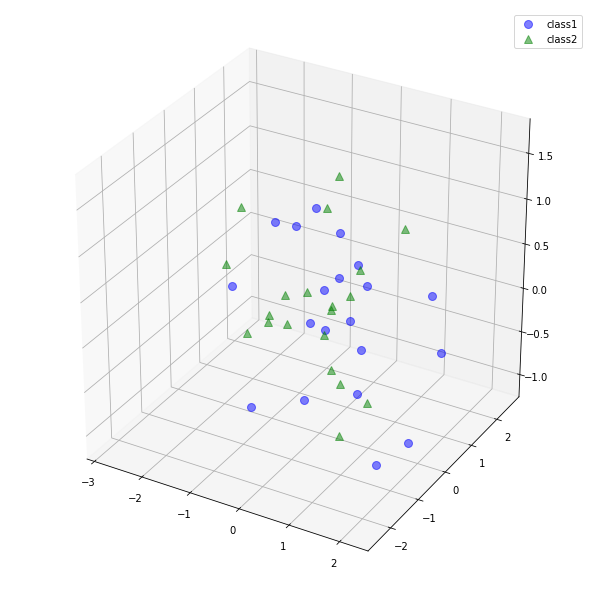

In [23]:
# Plot data

fig = plt.figure(figsize=(8,8))
from mpl_toolkits.mplot3d import axes3d, Axes3D

# 3d subplot
# 1 * 1 grid, 1st subplot
ax = Axes3D(fig)
plt.rcParams['legend.fontsize'] = 10

#plot samples
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:],
        'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:],
        '^', markersize=8, alpha=0.5, color='green', label='class2')

ax.legend(loc='upper right')

plt.show()

In [24]:
#merge

all_samples = np.concatenate((class1_sample, class2_sample), axis = 1)

In [26]:
all_samples.T

array([[ -2.46169559e-02,  -7.75161619e-01,   1.27375593e+00],
       [  1.96710175e+00,  -1.85798186e+00,   1.23616403e+00],
       [  1.62765075e+00,   3.38011697e-01,  -1.19926803e+00],
       [  8.63345318e-01,  -1.80920302e-01,  -6.03920628e-01],
       [ -1.23005814e+00,   5.50537496e-01,   7.92806866e-01],
       [ -6.23530730e-01,   5.20576337e-01,  -1.14434139e+00],
       [  8.01861032e-01,   4.65672984e-02,  -1.86569772e-01],
       [ -1.01745873e-01,   8.68886157e-01,   7.50411640e-01],
       [  5.29465324e-01,   1.37701210e-01,   7.78211279e-02],
       [  6.18380262e-01,   2.32494559e-01,   6.82551407e-01],
       [ -3.10116774e-01,  -2.43483776e+00,   1.03882460e+00],
       [  2.18697965e+00,   4.41364444e-01,  -1.00155233e-01],
       [ -1.36444744e-01,  -1.19054188e-01,   1.74094083e-02],
       [ -1.12201873e+00,  -5.17094458e-01,  -9.97026828e-01],
       [  2.48799161e-01,  -2.96641152e-01,   4.95211324e-01],
       [ -1.74703160e-01,   9.86335188e-01,   2.1353390

In [27]:
# compute the dimensional mean vector, help compute covar matrix
mean_x = np.mean(all_samples[0, :])
mean_y = np.mean(all_samples[1, :])
mean_z = np.mean(all_samples[2, :])

mean_vector = np.array(([[mean_x], [mean_y],[mean_y]] ))
mean_vector

array([[ 0.05907402],
       [ 0.102405  ],
       [ 0.102405  ]])

In [28]:
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
    

In [29]:
cov_mat

array([[ 1.16692878, -0.37685782, -0.03980615],
       [-0.37685782,  1.08130495, -0.10091948],
       [-0.03980615, -0.10091948,  0.50894854]])

In [34]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))

Eigenvector 1: 
[[ 0.74198969]
 [-0.66932385]
 [ 0.0381692 ]]
Eigenvalue 1 from scatter matrix: 1.50483180996
Eigenvector 2: 
[[-0.63806612]
 [-0.68757458]
 [ 0.34657297]]
Eigenvalue 2 from scatter matrix: 0.782451192808
Eigenvector 3: 
[[ 0.20572538]
 [ 0.28150804]
 [ 0.93724612]]
Eigenvalue 3 from scatter matrix: 0.469899266819


In [35]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i])
             for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

1.50483180996
0.782451192808
0.469899266819


In [36]:
#k is 2 
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1),
                      eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

('Matrix W:\n', array([[ 0.74198969, -0.63806612],
       [-0.66932385, -0.68757458],
       [ 0.0381692 ,  0.34657297]]))


In [37]:
#dot product between orignal matrix and eigen pairs
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."

In [38]:
print transformed

[[ 0.54918688  2.75034418  0.93568568  0.73863643 -1.25091752 -0.85476612
   0.55668279 -0.62841801  0.30366148  0.32927006  1.43924265  1.32347775
  -0.02089028 -0.52447838  0.40205723 -0.78165519  2.87006391 -1.03286492
   0.23470011 -0.68057301 -0.16159186 -0.43402517  0.82468187 -0.74673871
  -3.35529191 -2.12561961  0.72903691 -1.678461   -0.694233   -0.01830783
  -0.38373718  1.21065592 -1.90359336  1.54532254 -0.54362529  0.15235321
  -0.88969725 -0.39767672  0.1522554   1.24414438]
 [ 0.99013804  0.45078116 -1.68659093 -0.63577776  0.68108826 -0.35667901
  -0.60831889 -0.27243105 -0.40554304 -0.31787098  2.23203609 -1.73361969
   0.17495303  0.7259206   0.21683946 -0.49270176 -0.31812554 -2.39979083
   0.58919126 -0.39511191  0.53106303  1.71719219  0.53752735  0.99034173
   0.57693812 -0.54084301  0.18010452  0.29707499 -0.81334798 -0.61171759
  -1.33161925 -0.26218545 -0.01598359 -0.50719918 -0.67339879 -0.08466701
   0.59207504 -0.53816497  0.40300577  0.35925128]]


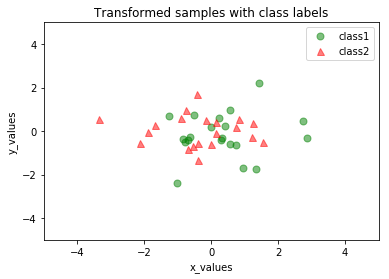

In [39]:
plt.plot(transformed[0,0:20], transformed[1,0:20],
         'o', markersize=7, color='green', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40],
         '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()
